# Exercise 12.3
The model in written in exercise 12.2 is tested on my handwritten digits created with gimps.

2023-10-09 19:11:05.872967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 19:11:05.967173: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-09 19:11:05.997170: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-09 19:11:06.516197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


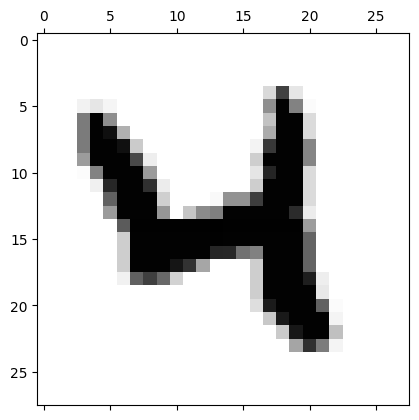

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Training using ADAM optimizer.
Model compiled successfully and ready to be trained.


2023-10-09 19:11:10.541194: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-10-09 19:11:10.541242: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-10-09 19:11:10.542299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3061 - acc: 0.9090 - val_loss: 0.1144 - val_acc: 0.9639
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1244 - acc: 0.9647 - val_loss: 0.0830 - val_acc: 0.9729
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0877 - acc: 0.9742 - val_loss: 0.0724 - val_acc: 0.9757
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0672 - acc: 0.9807 - val_loss: 0.0752 - val_acc: 0.9772
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0541 - acc: 0.9832 - val_loss: 0.0672 - val_acc: 0.9797
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0473 - acc: 0.9855 - val_loss: 0.0707 - val_acc: 0.9794
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0373 - acc: 0.9881 - val_loss: 0.0758 - val_acc: 0.9797
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.

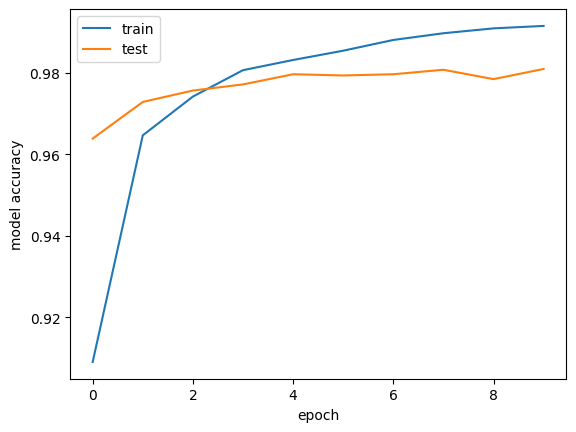

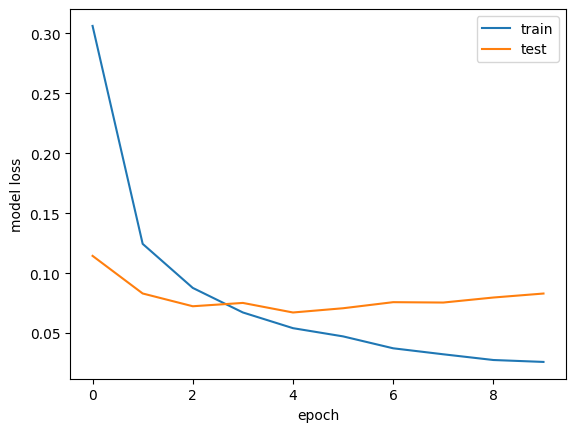

313/313 [==============================] - 0s 780us/step


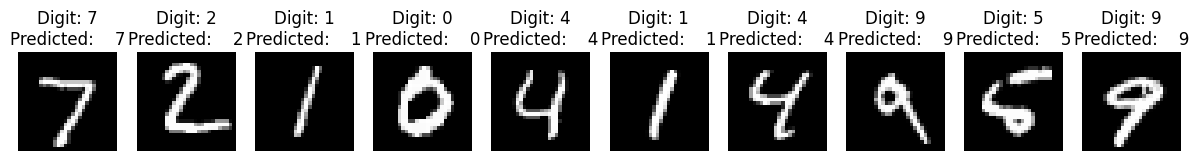

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image
import glob

optimizers =['ADAM']

for i in optimizers:

    seed=0
    np.random.seed(seed) # fix random seed
    tf.random.set_seed(seed)

    # input image dimensions
    img_rows, img_cols = 28, 28 # number of pixels 
    # output
    num_classes = 10 # 10 digits

    # the data, split between train and test sets
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()


    print('X_train shape:', X_train.shape)
    print('Y_train shape:', Y_train.shape)

    # reshape data, it could depend on Keras backend
    X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    print('X_train shape:', X_train.shape)
    print('X_test shape:', X_test.shape)
    print()

    # cast to floats
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # rescale data in interval [0,1]
    X_train /= 255
    X_test /= 255

    # look at an example of data point
    print('an example of a data point with label', Y_train[20])
    # matshow: display a matrix in a new figure window
    plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
    plt.show()

    # convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
    Y_train = keras.utils.to_categorical(Y_train, num_classes)
    Y_test = keras.utils.to_categorical(Y_test, num_classes)
    print('... and with label', Y_train[20], 'after to_categorical')
    print()
    print('X_train shape:', X_train.shape)
    print('Y_train shape:', Y_train.shape)


    def create_DNN():
        # instantiate model
        model = Sequential()
        # add a dense all-to-all relu layer
        model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
        # add a dense all-to-all relu layer
        model.add(Dense(100, activation='relu'))
        # apply dropout with rate 0.5
        model.add(Dropout(0.5))
        # soft-max layer
        model.add(Dense(num_classes, activation='softmax'))

        return model

    print('Model architecture created successfully!')
    
    print('Training using',i,'optimizer.')
    
    def compile_model():
        # create the model
        model=create_DNN()
        # compile the model
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=i,
                      metrics=['acc'])
        return model

    print('Model compiled successfully and ready to be trained.')

    # training parameters
    batch_size = 64
    epochs = 10

    # create the deep neural net
    model_DNN = compile_model()

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=1)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # look into training history

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

    #X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    predictions = model_DNN.predict(X_test)

    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()


./numbers/nove.png
Image size: 28x28


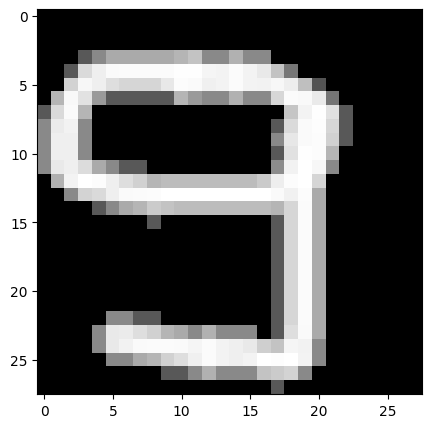

(28, 28)
./numbers/otto.png
Image size: 28x28


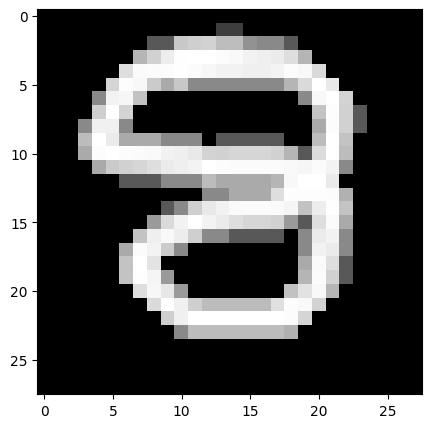

(28, 28)
./numbers/quattro_versione1.png
Image size: 28x28


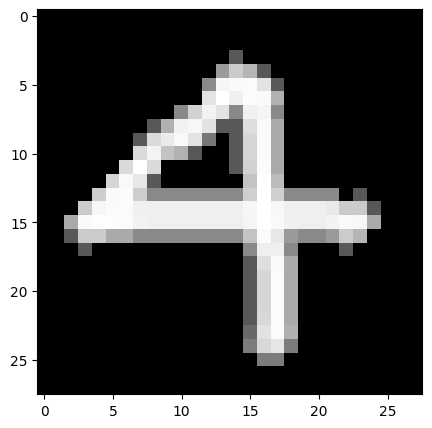

(28, 28)
./numbers/quattro_versione2.png
Image size: 28x28


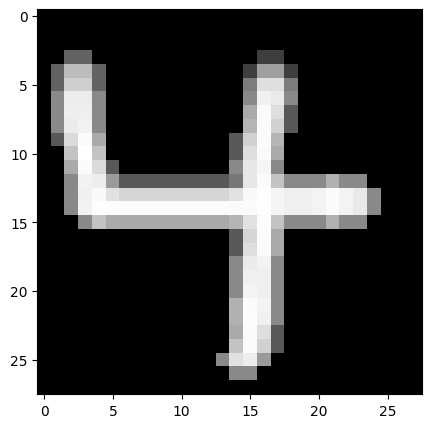

(28, 28)
./numbers/sei.png
Image size: 28x28


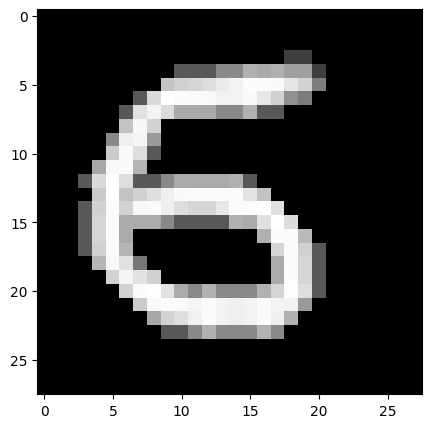

(28, 28)
./numbers/sette_v1.png
Image size: 28x28


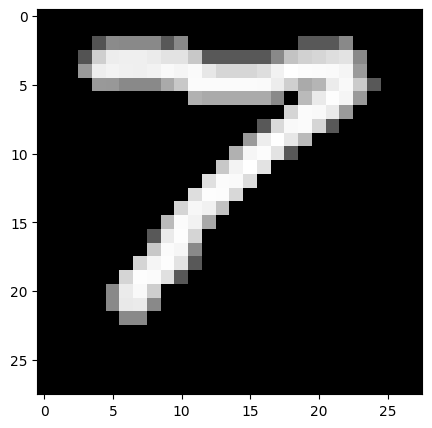

(28, 28)
./numbers/sette_v2.png
Image size: 28x28


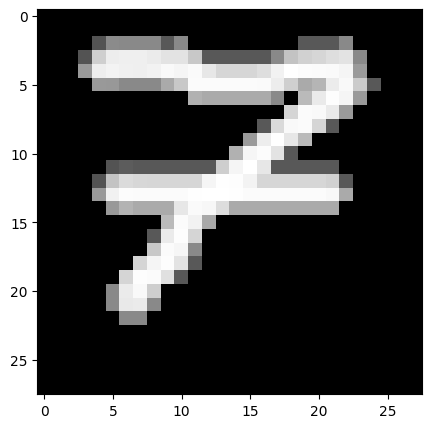

(28, 28)
./numbers/tre.png
Image size: 28x28


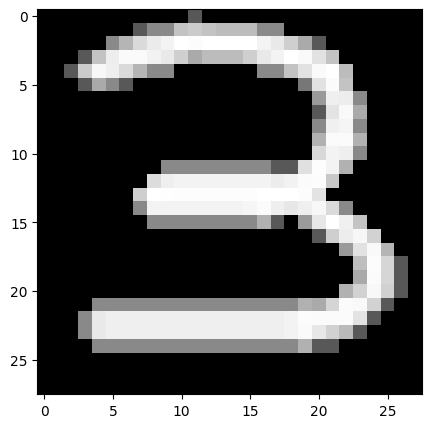

(28, 28)
./numbers/uno.png
Image size: 28x28


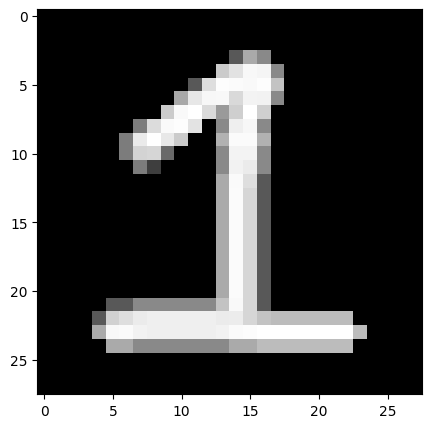

(28, 28)
./numbers/cinque.png
Image size: 28x28


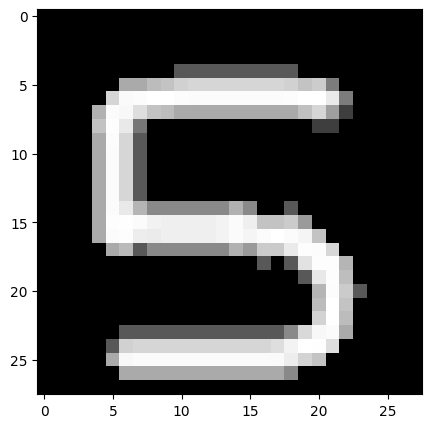

(28, 28)
./numbers/due.png
Image size: 28x28


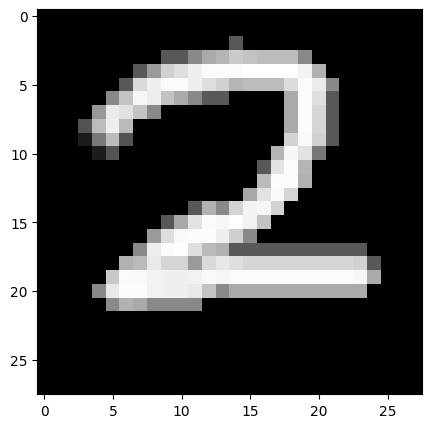

(28, 28)
./numbers/zero.png
Image size: 28x28


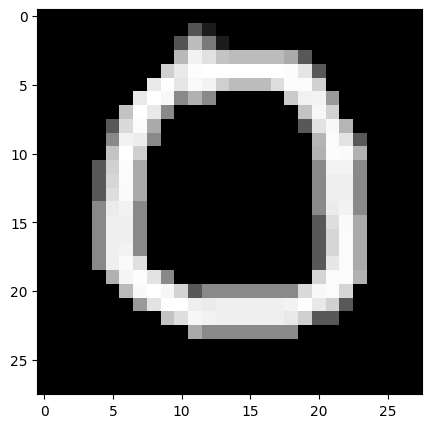

(28, 28)
12


In [2]:
image_list = []
for filename in glob.glob("./numbers/*.png"): 
    print(filename)
    im=Image.open(filename).convert('L')
    image_list.append(im)
    
    ydim, xdim = im.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=im.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    plt.figure(figsize=(5,5))
    plt.imshow(data, cmap='gray')
    plt.show()

    print(data.shape)
print(len(image_list))



## My handwritten digits

./numbers/nove.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 21ms/step


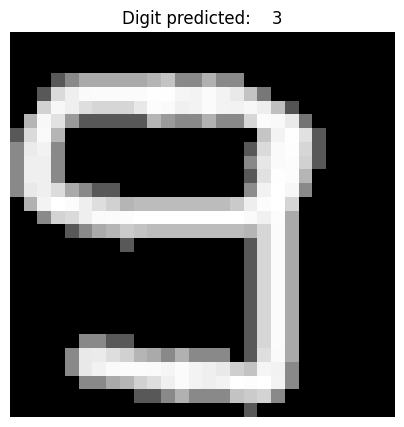

./numbers/otto.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 21ms/step


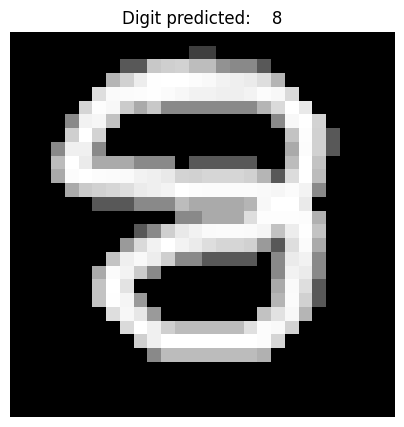

./numbers/quattro_versione1.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 23ms/step


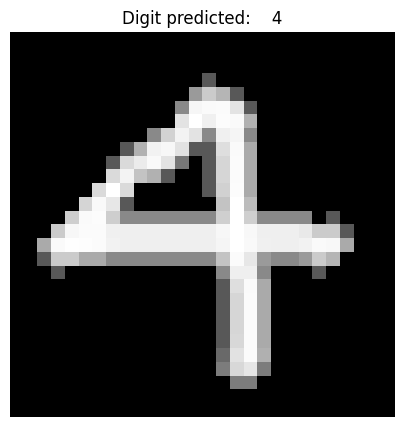

./numbers/quattro_versione2.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 19ms/step


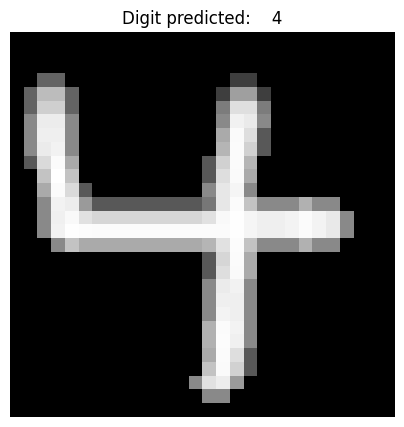

./numbers/sei.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 21ms/step


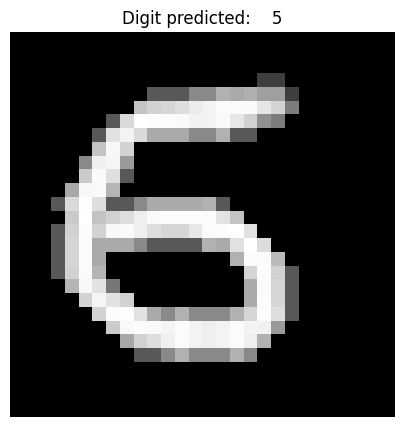

./numbers/sette_v1.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 20ms/step


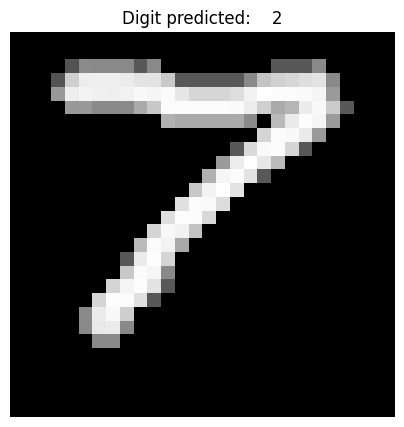

./numbers/sette_v2.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 20ms/step


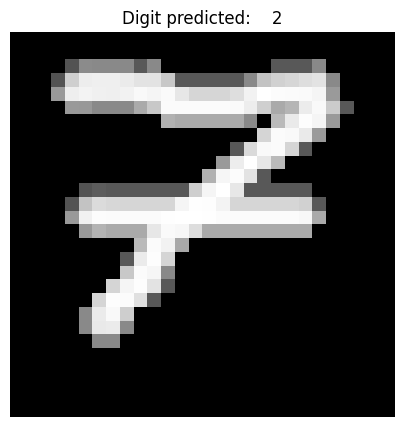

./numbers/tre.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 20ms/step


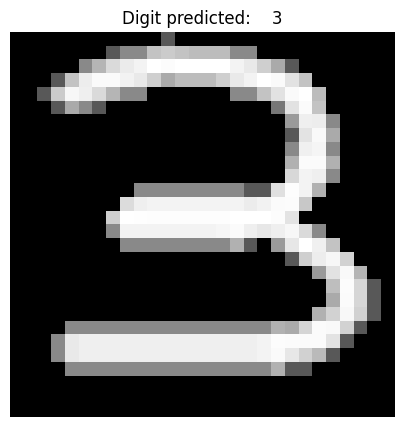

./numbers/uno.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 19ms/step


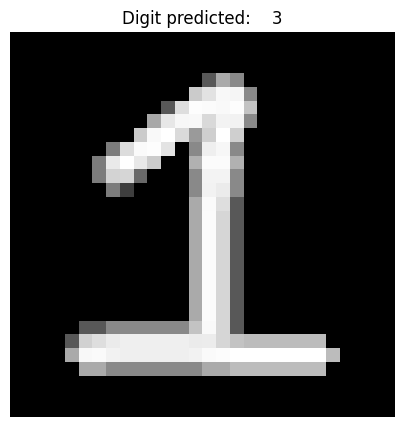

./numbers/cinque.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 19ms/step


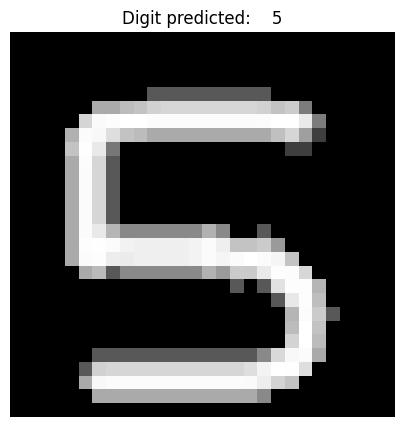

./numbers/due.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 17ms/step


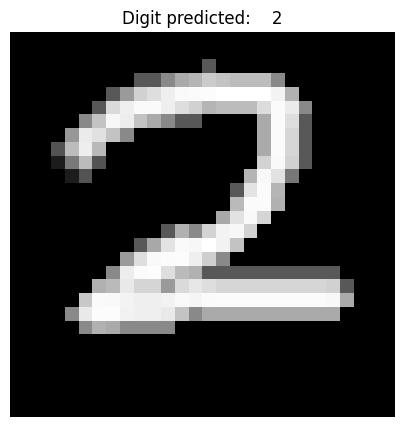

./numbers/zero.png
Image size: 28x28
(28, 28)
(1, 784)
1/1 [==============================] - 0s 21ms/step


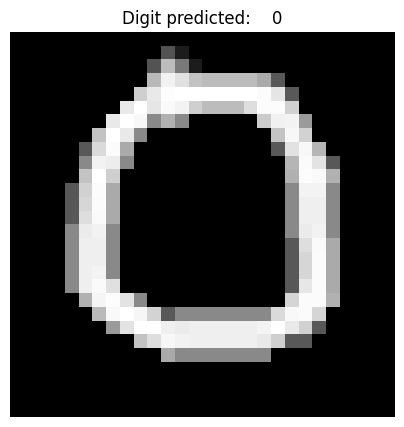

In [3]:
image_list = []
for filename in glob.glob("./numbers/*.png"): 
    print(filename)
    im=Image.open(filename).convert('L')
    image_list.append(im)
    
    ydim, xdim = im.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=im.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    print(data.shape)
    data = data.reshape(1,xdim*ydim)
    print(data.shape)
    pred_0 = model_DNN.predict(data)

    data = data.reshape(xdim,ydim)

    plt.figure(figsize=(5, 5))  
    plt.imshow(data, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    plt.show()

As it can be seen clearly the recognition of the digits is not perfect, it has to be said that the number of data and the type of data is limited.